In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib as mpl
import numpy as np
import seaborn as sns
import json

for font in font_manager.findSystemFonts('/Users/lxkr/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

for font in font_manager.findSystemFonts('/System/Library/Fonts/'):
    try:
        font_manager.fontManager.addfont(font)
    except:
        None

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# matplotlib.rc('font', family='Droid Serif')
matplotlib.rc('font', family='Helvetica')

In [160]:
architecture = 'graniterapids'
basePath = './' + architecture + '/'

In [272]:
datasets = [
    'wiki', 
    'openai', 
    'mxbai', 
    'arxiv', 
    'cohere',
    'clip',
    'yahoo', 
    'yandex', 
    'glove200', 
    'llama'
]

datasets_classic = [
    'gist',
    'sift',
    'fmnist'
]

datasets_for_varying_k = [
    'wiki', 
    'openai', 
    'mxbai', 
    'cohere', 
    'arxiv', 
    'clip', 
    'yahoo', 
    'yandex', 
    'glove200', 
    'llama'
]

datasets_for_opening = [
    'wiki', 
    'openai', 
    'mxbai', 
    'cohere', 
    'arxiv', 
    'clip', 
    'yahoo', 
    'yandex', 
    'glove200', 
    'llama'
]

dataset_mapping = {
    'wiki': "Wiki", 
    'openai': "OpenAI", 
    'mxbai': "MXBAI", 
    'gist': "GIST", 
    'arxiv': "arXiv", 
    'clip': "ImageNet", 
    'yahoo': "Yahoo", 
    'yandex': "Yandex", 
    'glove200': "GloVe", 
    'llama': "Llama",
    'cohere': "Cohere",
    'sift': "SIFT",
    'fmnist': "FMNIST"
}

colors = {
    'Wiki': 'orchid',
    'OpenAI': '#e16969',
    'MXBAI': '#f6b26b',
    'GIST': '#4b8bf5', 
    'arXiv': '#59b872',
    'ImageNet': '#536657',
    'Yahoo': '#eb9fa0',
    'Yandex': '#a9b7c6',
    'GloVe': '#2B3D41',
    'Llama': '#2B3D41',
    'Cohere': '#4b8bf5',
    'SIFT': '#2B3D41',
    'FMNIST': '#2B3D41'
}

colors_special = {
    'Wiki': '#eb9fa0',
    'OpenAI': '#eb9fa0',
    'MXBAI': '#eb9fa0',
    'GIST': '#eb9fa0', 
    'arXiv': '#eb9fa0',
    'ImageNet': '#eb9fa0',
    'Yahoo': '#eb9fa0',
    'Yandex': '#eb9fa0',
    'GloVe': '#eb9fa0',
    'Llama': '#eb9fa0',
    'Cohere': '#eb9fa0',
    'SIFT': '#eb9fa0',
    'FMNIST': '#eb9fa0'
}

algorithms_mapping = {
    'scikit': 'Scikit-Learn',
    'faiss': 'FAISS',
    'superkmeans': 'SuperKMeans'
}

colors_algorithms = {
    'Scikit-Learn': '#f6b26b',
    'FAISS': '#4b8bf5', 
    'SuperKMeans': '#59b872'
}

truth_order = np.array(["Cohere", "arXiv", "OpenAI", "Wiki", "MXBAI", "ImageNet", "Yahoo", "GloVe", "Yandex", "Llama"])
dataset_order = {v: i for i, v in enumerate(truth_order)}
print(dataset_order)

hatches = ["//", "\\\\", "----"]

{np.str_('Cohere'): 0, np.str_('arXiv'): 1, np.str_('OpenAI'): 2, np.str_('Wiki'): 3, np.str_('MXBAI'): 4, np.str_('ImageNet'): 5, np.str_('Yahoo'): 6, np.str_('GloVe'): 7, np.str_('Yandex'): 8, np.str_('Llama'): 9}


In [239]:
df_varying_k = pd.read_csv(basePath + 'varying_k.csv')
df_end_to_end = pd.read_csv(basePath + 'end_to_end.csv')
df_sampling = pd.read_csv(basePath + 'sampling.csv')
df_etr = pd.read_csv(basePath + 'early_termination.csv')
df_iters = pd.read_csv(basePath + 'pareto.csv')
df_scalability = pd.read_csv(basePath + 'scalability.csv')

df_classic = pd.read_csv(basePath + 'end_to_end.csv')

df_sampling = df_sampling[df_sampling['dataset'].isin(datasets)]
df_sampling['dataset'] = df_sampling['dataset'].apply(dataset_mapping.get)
df_sampling["sampling_fraction"] = df_sampling["config"].apply(lambda x: json.loads(x)["sampling_fraction"]) * 100
df_sampling["vectors_explored@100@1.00"] = df_sampling['vectors_explored@100@1.00'] / df_sampling['data_size'] * 100

df_varying_k = df_varying_k[df_varying_k['dataset'].isin(datasets_for_varying_k)]
df_varying_k['dataset'] = df_varying_k['dataset'].apply(dataset_mapping.get)
df_varying_k['algorithm'] = df_varying_k['algorithm'].apply(algorithms_mapping.get)
df_varying_k['construction_time'] = df_varying_k['construction_time_ms'] / 1000

df_scalability['dataset'] = df_scalability['dataset'].apply(dataset_mapping.get)
df_scalability['algorithm'] = df_scalability['algorithm'].apply(algorithms_mapping.get)
df_scalability['construction_time'] = df_scalability['construction_time_ms'] / 1000

df_end_to_end = df_end_to_end[df_end_to_end['dataset'].isin(datasets_for_opening)]
df_end_to_end['dataset'] = df_end_to_end['dataset'].apply(dataset_mapping.get)
df_end_to_end['dataset_verbose'] = df_end_to_end['dataset'] + "\nk = " + df_end_to_end['n_clusters'].astype(str)
df_end_to_end['algorithm'] = df_end_to_end['algorithm'].apply(algorithms_mapping.get)
df_end_to_end['construction_time'] = df_end_to_end['construction_time_ms'] / 1000

df_classic = df_classic[df_classic['dataset'].isin(datasets_classic)]
df_classic['dataset'] = df_classic['dataset'].apply(dataset_mapping.get)
df_classic['dataset_verbose'] = df_classic['dataset'] + "\nk = " + df_classic['n_clusters'].astype(str)
df_classic['algorithm'] = df_classic['algorithm'].apply(algorithms_mapping.get)
df_classic['construction_time'] = df_classic['construction_time_ms'] / 1000

df_etr = df_etr[df_etr['dataset'].isin(datasets_for_opening)]
df_etr['dataset'] = df_etr['dataset'].apply(dataset_mapping.get)
df_etr['dataset_verbose'] = df_etr['dataset'] + "\nk = " + df_etr['n_clusters'].astype(str)
df_etr['algorithm'] = df_etr['algorithm'].apply(algorithms_mapping.get)
df_etr['construction_time'] = df_etr['construction_time_ms'] / 1000
df_etr["etr_tol"] = df_etr["config"].apply(lambda x: json.loads(x).get("recall_tol", 0))
df_etr["sample_queries"] = df_etr["config"].apply(lambda x: json.loads(x).get("sample_queries", False))

df_iters = df_iters[df_iters['dataset'].isin(datasets_for_opening)]
df_iters['dataset'] = df_iters['dataset'].apply(dataset_mapping.get)
df_iters['dataset_verbose'] = df_iters['dataset'] + "\nk = " + df_iters['n_clusters'].astype(str)
df_iters['algorithm'] = df_iters['algorithm'].apply(algorithms_mapping.get)
df_iters['construction_time'] = df_iters['construction_time_ms'] / 1000
df_iters["sampling_fraction"] = df_iters["config"].apply(lambda x: json.loads(x)["sampling_fraction"]) * 100
df_iters = df_iters[df_iters['sampling_fraction'] >= 90]


df_end_to_end_m4 = pd.read_csv('./m4/' + 'end_to_end.csv')
df_end_to_end_zen5 = pd.read_csv('./zen5/' + 'end_to_end.csv')

df_end_to_end_m4 = df_end_to_end_m4[df_end_to_end_m4['dataset'].isin(datasets_for_opening)]
df_end_to_end_m4['dataset'] = df_end_to_end_m4['dataset'].apply(dataset_mapping.get)
df_end_to_end_m4['dataset_verbose'] = df_end_to_end_m4['dataset'] + "\nk = " + df_end_to_end['n_clusters'].astype(str)
df_end_to_end_m4['algorithm'] = df_end_to_end_m4['algorithm'].apply(algorithms_mapping.get)
df_end_to_end_m4['construction_time'] = df_end_to_end_m4['construction_time_ms'] / 1000

df_end_to_end_zen5 = df_end_to_end_zen5[df_end_to_end_zen5['dataset'].isin(datasets_for_opening)]
df_end_to_end_zen5['dataset'] = df_end_to_end_zen5['dataset'].apply(dataset_mapping.get)
df_end_to_end_zen5['dataset_verbose'] = df_end_to_end_zen5['dataset'] + "\nk = " + df_end_to_end['n_clusters'].astype(str)
df_end_to_end_zen5['algorithm'] = df_end_to_end_zen5['algorithm'].apply(algorithms_mapping.get)
df_end_to_end_zen5['construction_time'] = df_end_to_end_zen5['construction_time_ms'] / 1000

# Sampling

['Yahoo' 'Yandex' 'MXBAI' 'Wiki' 'OpenAI' 'arXiv' 'Cohere']


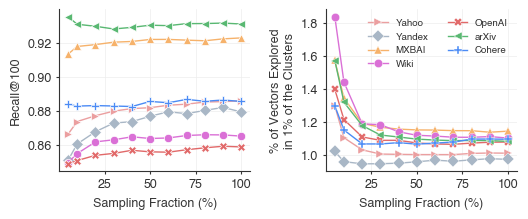

In [163]:
# 'o', 's', '^', 'v', '<', '>', 'D', 'P', 'X'
markers = {
    'Wiki': 'o',
    'OpenAI': 'X',
    'MXBAI': '^',
    'GIST': 'v',
    'ImageNet': 'P',
    'arXiv': '<',
    'Yahoo': '>',
    'Yandex': 'D',
    'GloVe': 'd',
    'Llama': 'P',
    'Cohere': 'P'
}

fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(5.9, 2.1)
plt.subplots_adjust(
    wspace=0.4
)

to_remove_ds = [
    'GloVe', 'Llama', 'ImageNet'
]

df_to_plot = df_sampling[~df_sampling['dataset'].isin(to_remove_ds)]

print(df_to_plot['dataset'].unique())

sns.lineplot(
    data=df_to_plot, 
    x="sampling_fraction", 
    y="recall@100@1.00", 
    hue='dataset',
    ax=ax1,
    markeredgewidth=0.5,
    linewidth=1.0,
    style="dataset",
    markers=markers,
    palette=colors,
    dashes=False
)
sns.lineplot(
    data=df_to_plot, 
    x="sampling_fraction", 
    y="vectors_explored@100@1.00", 
    hue='dataset',
    ax=ax2,
    markeredgewidth=0.3,
    linewidth=1.0,
    style="dataset",
    markers=markers,
    palette=colors,
    dashes=False
)
ax1.xaxis.grid(linewidth=0.5, color='#ededed')
ax1.yaxis.grid(linewidth=0.5, color='#ededed')
ax1.set_axisbelow(True)
ax2.xaxis.grid(linewidth=0.5, color='#ededed')
ax2.yaxis.grid(linewidth=0.5, color='#ededed')
ax2.set_axisbelow(True)

ax2.legend(
#     [handles[idx] for idx in order],[labels[idx] for idx in order],
    loc="upper right",
    prop={'size': 7.0},
    frameon=False,
    ncols=2,
    labelcolor=tick_fonts_color
)
ax1.legend().set_visible(False)

ax1.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
ax1.set_ylabel('Recall@100', fontdict={"size": 9}, color=font_color)
ax1.tick_params(axis='both', labelsize=9)

ax2.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
ax2.set_ylabel('% of Vectors Explored\nin 1% of the Clusters', fontdict={"size": 9}, color=font_color)
ax2.tick_params(axis='both', labelsize=9)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.spines['left'].set_color(tick_fonts_color)
ax1.spines['bottom'].set_color(tick_fonts_color)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)
ax2.spines['left'].set_color(tick_fonts_color)
ax2.spines['bottom'].set_color(tick_fonts_color)

ax1.tick_params(axis='both', colors=tick_fonts_color)
ax1.tick_params(axis='both', length=2, color=tick_fonts_color)
ax2.tick_params(axis='both', colors=tick_fonts_color)
ax2.tick_params(axis='both', length=2, color=tick_fonts_color)

plt.savefig(f'../plotter/paper_plots/sampling.png', format='png', dpi=600, bbox_inches='tight')

# **Sampling ALL**

['Llama' 'Yahoo' 'Yandex' 'GloVe' 'ImageNet' 'MXBAI' 'Wiki' 'OpenAI'
 'arXiv' 'Cohere']


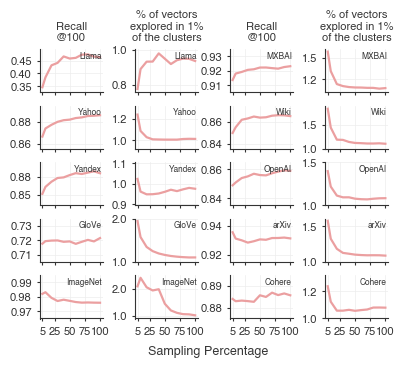

In [249]:
from matplotlib.ticker import FormatStrFormatter
import math

# 'o', 's', '^', 'v', '<', '>', 'D', 'P', 'X'
markers = {
    'Wiki': 'o',
    'OpenAI': 'X',
    'MXBAI': '^',
    'GIST': 'v',
    'ImageNet': 'P',
    'arXiv': '<',
    'Yahoo': '>',
    'Yandex': 'D',
    'GloVe': 'd',
    'Llama': 'P',
    'Cohere': 'P'
}

markers_special = {
    'Wiki': 'o',
    'OpenAI': 'o',
    'MXBAI': 'o',
    'GIST': 'o',
    'ImageNet': 'o',
    'arXiv': 'o',
    'Yahoo': 'o',
    'Yandex': 'o',
    'GloVe': 'o',
    'Llama': 'o',
    'Cohere': 'o'
}

fig, (
    (ax1, ax2, ax3, ax4),
    (ax5, ax6, ax7, ax8),
    (ax9, ax10, ax11, ax12),
    (ax13, ax14, ax15, ax16),
    (ax17, ax18, ax19, ax20)
) = plt.subplots(
    5, 4, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)

axes = [
    [ax1, ax2],
    [ax5, ax6],
    [ax9, ax10],
    [ax13, ax14],
    [ax17, ax18],
    [ax3, ax4],
    [ax7, ax8],
    [ax11, ax12],
    [ax15, ax16],
    [ax19, ax20],
]

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(4.5, 3.5)
plt.subplots_adjust(
    hspace=0.3,
    wspace=0.5
)

def ceil_2(x):
    return math.ceil(x * 100) / 100

def floor_2(x):
    return math.floor(x * 100) / 100

def ceil_1(x):
    return math.ceil(x * 10) / 10

def floor_1(x):
    return math.floor(x * 10) / 10

to_remove_ds = [
    # 'Llama', 
    'GloVe', 'Yahoo',
    'ImageNet', 'MXBAI', 'Wiki', 'OpenAI', 'arXiv', 'Cohere'
]

df_to_plot = df_sampling # df_sampling[df_sampling['dataset'].isin(to_remove_ds)]

print(df_to_plot['dataset'].unique())

for i, dataset in enumerate(df_to_plot['dataset'].unique()):
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    df_dataset = df_to_plot[df_to_plot['dataset'] == dataset]
    sns.lineplot(
        data=df_dataset, 
        x="sampling_fraction", 
        y="recall@100@1.00", 
        hue='dataset',
        ax=ax1,
        # markeredgewidth=0.5,
        # markersize=4.0,
        linewidth=1.6,
        style="dataset",
        # markers=markers_special,
        palette=colors_special,
        dashes=False
    )
    sns.lineplot(
        data=df_dataset, 
        x="sampling_fraction", 
        y="vectors_explored@100@1.00", 
        hue='dataset',
        ax=ax2,
        # markeredgewidth=0.5,
        # markersize=4.0,
        linewidth=1.6,
        style="dataset",
        # markers=markers_special,
        palette=colors_special,
        dashes=False
    )
    ax1.xaxis.grid(linewidth=0.5, color='#ededed')
    ax1.yaxis.grid(linewidth=0.5, color='#ededed')
    ax1.set_axisbelow(True)
    ax2.xaxis.grid(linewidth=0.5, color='#ededed')
    ax2.yaxis.grid(linewidth=0.5, color='#ededed')
    ax2.set_axisbelow(True)
    
    # leg = ax2.legend(
    #     loc="upper right",
    #     handlelength=0, handletextpad=0,
    #     prop={'size': 9.0},
    #     frameon=False,
    #     ncols=1,
    #     labelcolor=tick_fonts_color,
    # )
    # for h in leg.legend_handles:
    #     h.set_marker('')
    ax1.legend().set_visible(False)
    ax2.legend().set_visible(False)
    
    ax1.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
    # ax1.set_ylabel('Recall@100', fontdict={"size": 9}, color=font_color)
    # ax1.set_ylabel(f'{dataset}', fontdict={"size": 9}, color=font_color)
    ax1.set_ylabel('')
    ax1.tick_params(axis='both', labelsize=9)

    if i == 0 or i == 5:
        ax1.set_title('Recall\n@100', fontdict={"size": 8}, color=font_color)
        ax2.set_title('% of vectors\nexplored in 1%\nof the clusters', fontdict={"size": 8}, color=font_color)

    # if i == 2 or i == 5:
    #     ax2.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
    #     ax1.set_xlabel('Sampling Fraction (%)', fontdict={"size": 9}, color=font_color)
    # else:
    #     ax2.set_xlabel('')
    #     ax1.set_xlabel('')
    ax2.set_ylabel('')
    # ax2.set_ylabel('% of Vectors Explored\nin 1% of the Clusters', fontdict={"size": 9}, color=font_color)
    ax2.tick_params(axis='both', labelsize=9)
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(True)
    ax1.spines['left'].set_color(tick_fonts_color)
    ax1.spines['bottom'].set_color(tick_fonts_color)
    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(True)
    ax2.spines['left'].set_color(tick_fonts_color)
    ax2.spines['bottom'].set_color(tick_fonts_color)
    
    ax1.tick_params(axis='both', colors=tick_fonts_color)
    ax1.tick_params(axis='both', length=2, color=tick_fonts_color)
    ax2.tick_params(axis='both', colors=tick_fonts_color)
    ax2.tick_params(axis='both', length=2, color=tick_fonts_color)

    if i == 4 or i == 9:
        ax1.set_xticks([5, 25, 50, 75, 100], labels=['5', '25', '50', '75', '100'])
        ax2.set_xticks([5, 25, 50, 75, 100], labels=['5', '25', '50', '75', '100'])
        # ax1.set_xlabel('Sampling Percentage', fontdict={"size": 9}, color=font_color)
        # ax2.set_xlabel('Sampling Percentage', fontdict={"size": 9}, color=font_color)
        ax2.set_xlabel('')
        ax1.set_xlabel('')
    else:
        ax1.set_xticks([5, 25, 50, 75, 100], labels=['', '', '', '', ''])
        ax2.set_xticks([5, 25, 50, 75, 100], labels=['', '', '', '', ''])
        ax2.set_xlabel('')
        ax1.set_xlabel('')
        
    ax2.tick_params(axis='both', labelsize=8)
    ax1.tick_params(axis='both', labelsize=8)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    y_low, y_up = ax1.get_ylim()
    ax1.set_ylim((floor_2(y_low) - 0.005, ceil_2(y_up) + 0.005))

    y2_low, y2_up = ax2.get_ylim()
    ax2.set_ylim((floor_1(y2_low) - 0.005, ceil_1(y2_up) + 0.005))
    # ax1.set_title(f'{dataset}', fontdict={"size": 9}, color=font_color)
    ax1.text(0.98, 0.95, f'{dataset}', transform=ax1.transAxes, ha="right", va="top", fontdict={"size": 6}, color=font_color)
    ax2.text(0.98, 0.95, f'{dataset}', transform=ax2.transAxes, ha="right", va="top", fontdict={"size": 6}, color=font_color)

fig.supxlabel('Sampling Percentage', x=0.5, y=0.00, fontsize=9, color=font_color)

plt.savefig(f'../plotter/paper_plots/sampling_large.png', format='png', dpi=600, bbox_inches='tight')

# Increasing $k$ (opening)

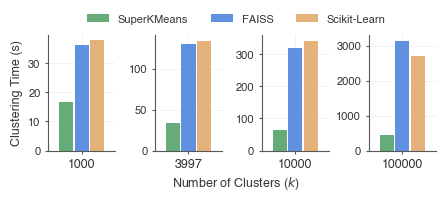

In [165]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    1, 4, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"

fig.set_size_inches(5.0, 1.5)
plt.subplots_adjust(
    wspace=0.6
)

axes = [ax1, ax2, ax3, ax4]

df_to_plot = df_varying_k[df_varying_k['dataset'] == 'OpenAI']
df_to_plot = df_to_plot[df_to_plot['n_clusters'] > 100]


for i, cur_k in enumerate(df_to_plot['n_clusters'].unique()):
    cur_ax = axes[i]
    sns.barplot(
        data=df_to_plot[df_to_plot['n_clusters'] == cur_k], 
        x="n_clusters", 
        y="construction_time", 
        hue='algorithm',
        ax=cur_ax,
        errorbar=None,
        dodge=True,
        gap=0.1,
        width=0.7,
        palette=colors_algorithms
    )
    cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.set_axisbelow(True)
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(5.2, 1.27),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 8.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Clustering Time (s)', fontdict={"size": 9}, color=font_color)
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')
    # cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
    cur_ax.set_xlabel('')

    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x', labelsize=9, colors=tick_fonts_color)
    cur_ax.tick_params(axis='y', labelsize=8, colors=tick_fonts_color)
    cur_ax.tick_params(axis='both', length=2, color="#585858")

fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.16, fontsize=9, color=font_color)

plt.savefig(f'../plotter/paper_plots/opening.png', format='png', dpi=600, bbox_inches='tight')

# Clustering Time

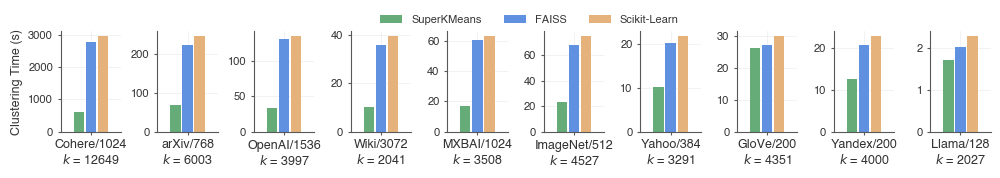

In [279]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(
    1, 10, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(12, 1.3)
plt.subplots_adjust(
    wspace=0.6
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_end_to_end

datasets_local = df_to_plot['dataset'].unique()
datasets_local = datasets_local[np.argsort([dataset_order[v] for v in datasets_local])]

for i, cur_dataset in enumerate(datasets_local):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    sns.barplot(
        data=df_to_plot[df_to_plot['dataset'] == cur_dataset], 
        x="dataset", 
        y="construction_time", 
        hue='algorithm',
        ax=cur_ax,
        errorbar=None,
        dodge=True,
        gap=0.15,
        width=0.6,
        palette=colors_algorithms
    )
    cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.set_axisbelow(True)
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(10.4, 1.27),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 8.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Clustering Time (s)', fontdict={"size": 9}, color=font_color)
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')
    # cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
    cur_ax.set_xlabel(f'')
    cur_ax.set_xticks([0], labels=[f'{cur_dataset}/{dim}\n$k$ = {n_clusters}'])
    

    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x',  labelsize=9, colors=tick_fonts_color)
    cur_ax.tick_params(axis='y', labelsize=8, colors=tick_fonts_color)
    cur_ax.tick_params(axis='both', length=2, color="#585858")

# fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.09, fontsize=9, color=font_color)

plt.savefig(f'../plotter/paper_plots/clustering_time.png', format='png', dpi=600, bbox_inches='tight')

# Table 1

In [167]:
table_1 = df_end_to_end[['dataset', 'algorithm', 'n_clusters', 'construction_time', 'recall@100@1.00', 'recall@10@1.00', 'vectors_explored@100@1.00', 'final_objective']]
table_1 = table_1[table_1['algorithm'].isin(['SuperKMeans', 'FAISS'])]
table_1

,dataset,algorithm,n_clusters,construction_time,recall@100@1.00,recall@10@1.00,vectors_explored@100@1.00,final_objective
6,Llama,SuperKMeans,2027,1.71885,0.463220,0.547399,2362.25,1.883968e+04
7,Llama,FAISS,2027,2.02271,0.465420,0.544300,2386.28,1.882864e+04
12,Yahoo,SuperKMeans,3291,10.21738,0.886048,0.930901,6861.45,4.062483e+05
13,Yahoo,FAISS,3291,20.29825,0.885399,0.929301,6798.40,4.061829e+05
15,Yandex,SuperKMeans,4000,12.61175,0.879489,0.922101,9757.99,4.831025e+05
16,Yandex,FAISS,4000,20.72423,0.878649,0.917601,9499.79,4.834311e+05
18,GloVe,SuperKMeans,4351,26.20922,0.721520,0.813201,13030.55,1.126008e+06
19,GloVe,FAISS,4351,26.97710,0.720750,0.813301,13110.64,1.126158e+06
21,ImageNet,SuperKMeans,4527,23.07717,0.975879,0.992100,12981.73,2.915908e+05
22,ImageNet,FAISS,4527,67.70143,0.975259,0.989500,13046.19,2.914623e+05


# Increasing K

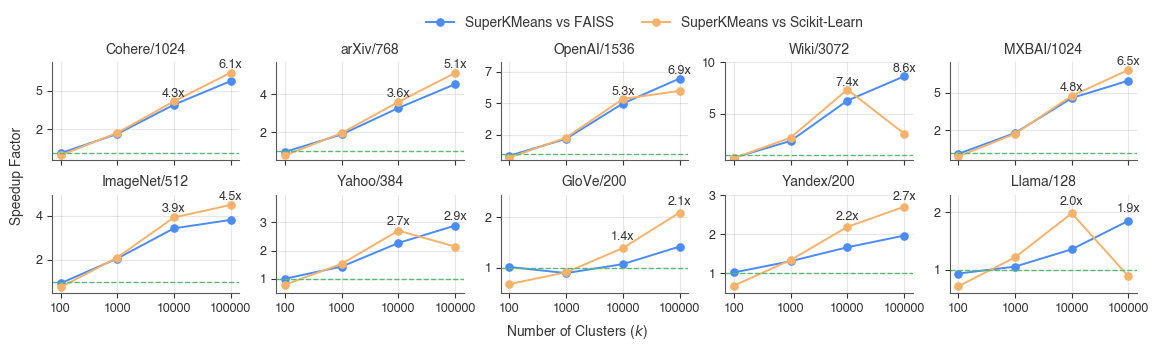

In [281]:
from matplotlib.ticker import FormatStrFormatter

fig, (
    (ax1, ax2, ax3, ax4, ax5),
    (ax6, ax7, ax8, ax9, ax10)
) = plt.subplots(
    2, 5, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(14, 3.0)
plt.subplots_adjust(
    wspace=0.2,
    hspace=0.35,
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_varying_k[
    (df_varying_k['n_clusters'] % 10 == 0) &
    (df_varying_k['n_clusters'] > 10)
]

datasets_local = df_to_plot['dataset'].unique()
datasets_local = datasets_local[np.argsort([dataset_order[v] for v in datasets_local])]

for i, cur_dataset in enumerate(datasets_local):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    df_dataset = df_to_plot[df_to_plot['dataset'] == cur_dataset]
    
    algo_data = {}
    for algo in ['SuperKMeans', 'FAISS', 'Scikit-Learn']:
        df_algo = df_dataset[df_dataset['algorithm'] == algo]
        if len(df_algo) > 0:
            algo_data[algo] = df_algo.sort_values('n_clusters')
    
    k_values = sorted(df_dataset['n_clusters'].unique())
    
    # === Subplot 1: Construction time bars ===
    x = np.arange(len(k_values))
    width = 0.25
    skm_times = algo_data['SuperKMeans'].set_index('n_clusters')['construction_time_ms']
    
    # === Subplot 2: Speedup relative to SuperKMeans ===
    for algo, label in [('FAISS', 'SuperKMeans vs FAISS'),
                        ('Scikit-Learn', 'SuperKMeans vs Scikit-Learn')]:
        if algo in algo_data:
            speedups = []
            for k in k_values:
                skm_time = skm_times.get(k, None)
                df_k = algo_data[algo][algo_data[algo]['n_clusters'] == k]
    
                if skm_time and len(df_k) > 0:
                    time = df_k['construction_time_ms'].values[0]
                    speedup = time / skm_time
                    speedups.append(speedup)
                else:
                    speedups.append(None)
    
            # Plot line with markers
            valid_indices = [i for i, s in enumerate(speedups) if s is not None]
            valid_k = [k_values[i] for i in valid_indices]
            valid_speedups = [speedups[i] for i in valid_indices]
    
            cur_ax.plot(valid_k, valid_speedups, 'o-',
                    label=label, color=colors_algorithms.get(algo, font_color),
                    linewidth=1.4, markersize=5.2, alpha=1.0)
    
            # Add speedup value labels
            offset = 0.1 
            y_min, y_max = cur_ax.get_ylim()
            cur_ax.set_ylim(y_min, y_max + 0.5)
            # offset = offset / y_min
            for k, speedup in zip(valid_k, valid_speedups):
                if k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'FAISS': 
                  cur_ax.text(
                        k, 
                        speedup + offset, 
                        f'{speedup:.1f}x',
                        ha='center', 
                        va='bottom', fontsize=9, color=font_color, fontweight='bold')
                elif k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'Scikit-Learn':
                    None
                elif k > 1000 and algo == 'Scikit-Learn':
                    cur_ax.text(
                        k, 
                        speedup + offset, 
                        f'{speedup:.1f}x',
                        ha='center', 
                        va='bottom', fontsize=9, color=font_color, fontweight='bold')
    
    cur_ax.set_title(f'{cur_dataset}/{dim}', fontsize=10, color=font_color)
    
    # Add baseline line at 1.0x
    cur_ax.axhline(y=1.0, color=colors_algorithms.get('SuperKMeans'), linestyle='--',
                linewidth=1.0, alpha=1.0)
    
    cur_ax.set_xscale('log')
    cur_ax.set_xticks(k_values)
    # cur_ax.set_xticklabels([f'{k:,}' for k in k_values])
    cur_ax.set_xticklabels([f'' for k in k_values])
    if i > 4:
        cur_ax.set_xticklabels([f'{k:}' for k in k_values])
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(4.4, 1.6),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 10.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Speedup Factor\n')
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')

    cur_ax.tick_params(axis='x', labelsize=9)
    cur_ax.tick_params(axis='y', labelsize=9, colors=tick_fonts_color)
    cur_ax.set_xlabel('')
    cur_ax.set_ylabel('')
    cur_ax.grid(True, alpha=0.3, which='both')
    cur_ax.set_axisbelow(True)
    cur_ax.set_ylim(bottom=0.5)
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x', colors=tick_fonts_color)
    cur_ax.grid(which='minor', visible=False)
    cur_ax.tick_params(which='minor', length=0)
    cur_ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    if i == 9:
        cur_ax.set_ylim((0.6, 2.3))
    # cur_ax.tick_params(axis='both', length=2, color="#585858")
    
#plt.tight_layout()
fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.05, fontsize=10, color=font_color)
fig.supylabel('Speedup Factor', x=0.095, y=0.5, fontsize=10, color=font_color)
# Save plot
plt.savefig(f'../plotter/paper_plots/varying_k.png', format='png', dpi=600, bbox_inches='tight')
# plt.close()

# Early Termination

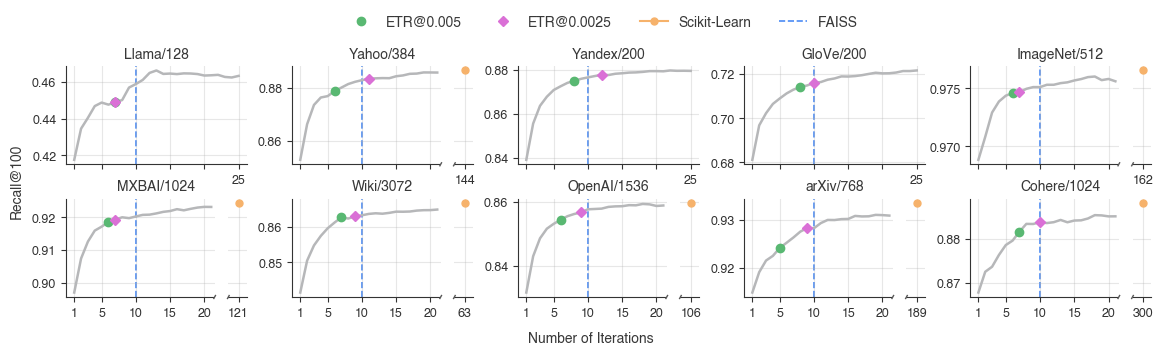

In [187]:
fig, (
    (ax1, ax2, ax3, ax4, ax5),
    (ax6, ax7, ax8, ax9, ax10)
) = plt.subplots(
    2, 5, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)

import matplotlib.patches as patches

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(14, 3.0)
plt.subplots_adjust(
    wspace=0.25,
    hspace=0.35,
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_iters

SAMPLE_QUERIES = False
METRIC_TO_USE = 'recall@100@1.00'

for i, cur_dataset in enumerate(df_to_plot['dataset'].unique()):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    df_dataset = df_to_plot[df_to_plot['dataset'] == cur_dataset]
    
    iter_values = sorted(df_dataset['n_iters'].unique())

    # print(df_etr[(df_etr['dataset'] == cur_dataset)]['etr_tol'])

    etr_at_0_1 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.0025)]['actual_iterations'].values[0]
    etr_at_0_5 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.005)]['actual_iterations'].values[0]
    etr_at_1_0 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.01)]['actual_iterations'].values[0]

    scikit_learn_x = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)]['actual_iterations'].values[0]
    scikit_learn_y = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)][METRIC_TO_USE].values[0]
    
    
    # === Subplot 1: Construction time bars ===
    x = np.arange(len(iter_values))
    width = 0.25
    skm_times = algo_data['SuperKMeans'].set_index('n_clusters')['construction_time_ms']
    
    # === Subplot 2: Speedup relative to SuperKMeans ===
    # Plot line with markers
    valid_iters = df_dataset['n_iters']
    valid_recalls = df_dataset[METRIC_TO_USE]
    # valid_recalls = df_dataset['vectors_explored@100@1.00']

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(valid_iters[:21], valid_recalls[:21], '-', color='#b6b7b9',
            linewidth=1.8, markersize=2.2, alpha=1.0)
    else:
        cur_ax.plot(valid_iters, valid_recalls, '-', color='#b6b7b9',
            linewidth=1.8, markersize=2.2, alpha=1.0)
    
    labels = [
        'ETR@0.005', 'ETR@0.0025', 
    ]
    etr_colors = [
        #'red', 
        '#59b872', 'orchid',
        # 'green'
    ]
    sizes= [6.0, 5.0, 3.0, 2.5]
    markers = ['o', 'D', 'x', 'x']
    for k, etr_value in enumerate([
        # etr_at_0_0_1,
        etr_at_0_5,
        etr_at_0_1,
        # etr_at_1_0
    ]):
        y_val = valid_recalls.values[etr_value - 1]
        cur_ax.plot(etr_value, y_val, markers[k],
            label=labels[k], color=etr_colors[k], markersize=sizes[k], alpha=1.0)


    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(25, scikit_learn_y, marker='o',
            label='Scikit-Learn', color='#f6b26b', markersize=5.0, alpha=1.0)

    # Add speedup value labels
    # offset = 0.1 
    # y_min, y_max = cur_ax.get_ylim()
    # cur_ax.set_ylim(y_min, y_max + 0.2)
    # # offset = offset / y_min
    # for k, speedup in zip(valid_k, valid_speedups):
    #     if k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'FAISS': 
    #       cur_ax.text(
    #             k, 
    #             speedup + offset, 
    #             f'{speedup:.1f}x',
    #             ha='center', 
    #             va='bottom', fontsize=9, color=font_color, fontweight='bold')
    #     elif k == 100000 and cur_dataset in ['Yahoo', 'OpenAI', 'Wiki', 'Llama'] and algo == 'Scikit-Learn':
    #         None
    #     elif k > 1000 and algo == 'Scikit-Learn':
    #         cur_ax.text(
    #             k, 
    #             speedup + offset, 
    #             f'{speedup:.1f}x',
    #             ha='center', 
    #             va='bottom', fontsize=9, color=font_color, fontweight='bold')
    
    cur_ax.set_title(f'{cur_dataset}/{dim}', fontsize=10, color=font_color)
    
    # Add baseline line at 1.0x
    # cur_ax.axhline(y=1.0, color=colors_algorithms.get('SuperKMeans'), linestyle='--',
    #             linewidth=1.0, alpha=0.7)
    cur_ax.axvline(x=10, color=colors_algorithms.get('FAISS'), linestyle='--',
                linewidth=1.2, alpha=1.0, label='FAISS', zorder=-1)
    
    # cur_ax.set_xscale('log')
    cur_ax.set_xticks([1, 5, 10, 15, 20, 25])
    cur_ax.set_xticklabels(['', '', '', '', '', '25'])
    if i > 4:
        cur_ax.set_xticklabels(['1', '5', '10', '15', '20', '25'])
    if i == 1:
        cur_ax.legend(
            bbox_to_anchor=(3.2, 1.65),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 10.0},
            labelcolor=font_color,
            frameon=False,
            ncols=4
        )
    else:
        cur_ax.legend().set_visible(False)

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        gap_start, gap_end = 21.5, 23.5
        if i > 4:
            cur_ax.set_xticklabels(['1', '5', '10', '15', '20', scikit_learn_x])
        else:
            cur_ax.set_xticklabels(['', '', '', '', '', scikit_learn_x])
        rect = patches.Rectangle(
            (gap_start, -0.15),          # y < 0 to cover ticks/labels
            gap_end - gap_start,
            1.3,                         # extend above and below axis
            transform=cur_ax.get_xaxis_transform(),
            facecolor="white",
            edgecolor="none",
            clip_on=False,
            zorder=10
        )
        cur_ax.add_patch(rect)
        d = 0.015   # size of diagonal lines (axes units)
        lw = 1.0
        for x0 in (gap_start, gap_end):
            cur_ax.plot(
                [x0 - 0.12, x0 + 0.12],   # x in data units
                [-d, +d],                # y in axes units
                transform=cur_ax.get_xaxis_transform(),
                color="#585858",
                linewidth=lw,
                clip_on=False,
                zorder=11
            )

    cur_ax.tick_params(axis='x', labelsize=9)
    cur_ax.tick_params(axis='y', labelsize=9, colors=tick_fonts_color)
    cur_ax.set_xlabel('')
    cur_ax.set_ylabel('')
    cur_ax.grid(True, alpha=0.3, which='both')
    cur_ax.set_axisbelow(True)
    # cur_ax.set_ylim(bottom=0.5)
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color(tick_fonts_color)
    cur_ax.spines['bottom'].set_color(tick_fonts_color)
    cur_ax.grid(which='minor', visible=False)
    
    cur_ax.tick_params(axis='x', colors=tick_fonts_color)
    cur_ax.tick_params(which='minor', length=0)

    cur_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if i == 4:
        cur_ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        
    #y_low, y_up = cur_ax.get_ylim()
    #cur_ax.set_ylim((floor_2(y_low), ceil_2(y_up)))
    
    # cur_ax.tick_params(axis='both', length=2, color="#585858")
    
#plt.tight_layout()
fig.supxlabel('Number of Iterations', x=0.5, y=-0.05, fontsize=10, color=font_color)
fig.supylabel('Recall@100', x=0.085, y=0.5, fontsize=10, color=font_color)
# Save plot
plt.savefig(f'../plotter/paper_plots/iters.png', format='png', dpi=600, bbox_inches='tight')
# plt.close()

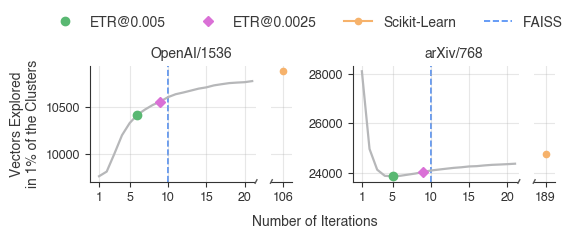

In [178]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
)

import matplotlib.patches as patches

tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(6, 1.5)
plt.subplots_adjust(
    wspace=0.3,
    hspace=0.35,
)

axes = [ax1, ax2]

df_to_plot = df_iters

SAMPLE_QUERIES = False
METRIC_TO_USE = 'vectors_explored@100@1.00'

for i, cur_dataset in enumerate(['OpenAI', 'arXiv']):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    df_dataset = df_to_plot[df_to_plot['dataset'] == cur_dataset]
    
    iter_values = sorted(df_dataset['n_iters'].unique())

    # print(df_etr[(df_etr['dataset'] == cur_dataset)]['etr_tol'])

    etr_at_0_1 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.0025)]['actual_iterations'].values[0]
    etr_at_0_5 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.005)]['actual_iterations'].values[0]
    etr_at_1_0 = df_etr[(df_etr['sample_queries'] == SAMPLE_QUERIES) & (df_etr['dataset'] == cur_dataset) & (df_etr['etr_tol'] ==   0.01)]['actual_iterations'].values[0]

    scikit_learn_x = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)]['actual_iterations'].values[0]
    scikit_learn_y = df_etr[(df_etr['algorithm'] == 'Scikit-Learn') & (df_etr['dataset'] == cur_dataset)][METRIC_TO_USE].values[0]
    
    
    # === Subplot 1: Construction time bars ===
    x = np.arange(len(iter_values))
    width = 0.25
    skm_times = algo_data['SuperKMeans'].set_index('n_clusters')['construction_time_ms']
    
    # === Subplot 2: Speedup relative to SuperKMeans ===
    # Plot line with markers
    valid_iters = df_dataset['n_iters']
    valid_recalls = df_dataset[METRIC_TO_USE]
    # valid_recalls = df_dataset['vectors_explored@100@1.00']

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(valid_iters[:21], valid_recalls[:21], '-', color='#b6b7b9',
            linewidth=1.6, markersize=2.2, alpha=1.0)
    else:
        cur_ax.plot(valid_iters, valid_recalls, '-', color='#b6b7b9',
            linewidth=1.6, markersize=2.2, alpha=1.0)
    
    labels = [
        'ETR@0.005', 'ETR@0.0025', 
    ]
    etr_colors = [
        #'red', 
        '#59b872', 'orchid',
        # 'green'
    ]
    sizes= [6.0, 5.0, 3.0, 2.5]
    markers = ['o', 'D', 'x', 'x']
    for k, etr_value in enumerate([
        # etr_at_0_0_1,
        etr_at_0_5,
        etr_at_0_1,
        # etr_at_1_0
    ]):
        y_val = valid_recalls.values[etr_value - 1]
        cur_ax.plot(etr_value, y_val, markers[k],
            label=labels[k], color=etr_colors[k], markersize=sizes[k], alpha=1.0)


    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        cur_ax.plot(25, scikit_learn_y, marker='o',
            label='Scikit-Learn', color='#f6b26b', markersize=4.5, alpha=1.0)

    cur_ax.set_title(f'{cur_dataset}/{dim}', fontsize=10, color=font_color)
    cur_ax.axvline(x=10, color=colors_algorithms.get('FAISS'), linestyle='--',
                linewidth=1.2, alpha=1.0, label='FAISS', zorder=-1)
    
    # cur_ax.set_xscale('log')
    cur_ax.set_xticks([1, 5, 10, 15, 20, 25])
    cur_ax.set_xticklabels(['', '', '', '', '', '25'])
    if i > 4:
        cur_ax.set_xticklabels(['1', '5', '10', '15', '20', '25'])
    if i == 1:
        cur_ax.legend(
            bbox_to_anchor=(1.1, 1.55),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 10.0},
            labelcolor=font_color,
            frameon=False,
            ncols=4
        )
    else:
        cur_ax.legend().set_visible(False)

    if cur_dataset not in ['Llama', 'Yandex', 'GloVe']:
        gap_start, gap_end = 21.5, 23.5
        cur_ax.set_xticklabels(['1', '5', '10', '15', '20', scikit_learn_x])
        rect = patches.Rectangle(
            (gap_start, -0.15),          # y < 0 to cover ticks/labels
            gap_end - gap_start,
            1.3,                         # extend above and below axis
            transform=cur_ax.get_xaxis_transform(),
            facecolor="white",
            edgecolor="none",
            clip_on=False,
            zorder=10
        )
        cur_ax.add_patch(rect)
        d = 0.015   # size of diagonal lines (axes units)
        lw = 1.0
        for x0 in (gap_start, gap_end):
            cur_ax.plot(
                [x0 - 0.12, x0 + 0.12],   # x in data units
                [-d, +d],                # y in axes units
                transform=cur_ax.get_xaxis_transform(),
                color="#585858",
                linewidth=lw,
                clip_on=False,
                zorder=11
            )

    cur_ax.tick_params(axis='x', labelsize=9)
    cur_ax.tick_params(axis='y', labelsize=9, colors=tick_fonts_color)
    cur_ax.set_xlabel('')
    cur_ax.set_ylabel('')
    cur_ax.grid(True, alpha=0.3, which='both')
    cur_ax.set_axisbelow(True)
    # cur_ax.set_ylim(bottom=0.5)
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color(tick_fonts_color)
    cur_ax.spines['bottom'].set_color(tick_fonts_color)
    cur_ax.grid(which='minor', visible=False)
    
    cur_ax.tick_params(axis='x', colors=tick_fonts_color)
    cur_ax.tick_params(which='minor', length=0)
    if i == 0:
        cur_ax.set_ylabel('Vectors Explored\nin 1% of the Clusters', color=font_color)
    
    # cur_ax.tick_params(axis='both', length=2, color="#585858")
    
#plt.tight_layout()
fig.supxlabel('Number of Iterations', x=0.5, y=-0.2, fontsize=10, color=font_color)
# fig.supylabel('', x=0.02, y=0.5, fontsize=10, color=font_color)
# Save plot
plt.savefig(f'../plotter/paper_plots/iters_explored.png', format='png', dpi=600, bbox_inches='tight')
# plt.close()

# Classic Datasets

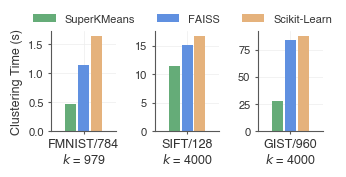

In [750]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(3.5, 1.3)
plt.subplots_adjust(
    wspace=0.6
)

axes = [ax1, ax2, ax3]

df_to_plot = df_classic

for i, cur_dataset in enumerate(df_to_plot['dataset'].unique()):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    sns.barplot(
        data=df_to_plot[df_to_plot['dataset'] == cur_dataset], 
        x="dataset", 
        y="construction_time", 
        hue='algorithm',
        ax=cur_ax,
        errorbar=None,
        dodge=True,
        gap=0.15,
        width=0.6,
        palette=colors_algorithms
    )
    cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.set_axisbelow(True)
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(4.5, 1.27),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 8.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Clustering Time (s)', fontdict={"size": 9}, color=font_color)
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')
    # cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
    cur_ax.set_xlabel(f'')
    cur_ax.set_xticks([0], labels=[f'{cur_dataset}/{dim}\n$k$ = {n_clusters}'])
    

    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x',  labelsize=9, colors=tick_fonts_color)
    cur_ax.tick_params(axis='y', labelsize=8, colors=tick_fonts_color)
    cur_ax.tick_params(axis='both', length=2, color="#585858")

# fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.09, fontsize=9, color=font_color)

plt.savefig(f'../plotter/paper_plots/classic.png', format='png', dpi=600, bbox_inches='tight')

[697.87071 354.8885  202.51834 110.74486  67.3002 ]
[2790.83097 1364.1359   729.59446  387.20053  221.08633]


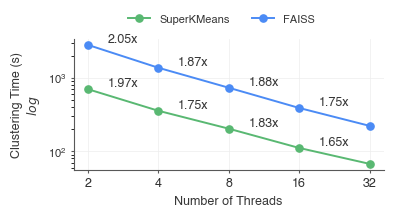

In [38]:
fig, (ax1) = plt.subplots(
    1, 1, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"

fig.set_size_inches(4.0, 1.7)
# plt.subplots_adjust(
#     wspace=0.6
# )

axes = [ax1]

df_to_plot = df_scalability[df_scalability['dataset'] == 'arXiv']


cur_ax = axes[0]
# sns.barplot(
#     data=df_to_plot[df_to_plot['threads'] == cur_threads], 
#     x="threads", 
#     y="construction_time", 
#     hue='algorithm',
#     ax=cur_ax,
#     errorbar=None,
#     dodge=True,
#     gap=0.1,
#     width=0.7,
#     palette=colors_algorithms
# )

n_threads_pos = [0, 1, 2, 3, 4]
n_threads = [2, 4, 8, 16, 32]

for algo in ['SuperKMeans', 'FAISS']:
    runtimes = df_to_plot[df_to_plot['algorithm'] == algo]['construction_time'].values
    print(runtimes)
    cur_ax.plot(n_threads_pos, runtimes, 'o-',
        label=algo, color=colors_algorithms.get(algo, font_color),
        linewidth=1.4, markersize=5.2, alpha=1.0)
    for z in range(1, len(n_threads)):
        text_y = runtimes[z - 1]
        speedup = runtimes[z - 1] / runtimes[z]
        text_x = n_threads_pos[z - 1] + 0.5
        cur_ax.text(
                        text_x, 
                        text_y, 
                        f'{speedup:.2f}x',
                        ha='center', 
                        va='bottom', fontsize=9, color=font_color, fontweight='bold')

cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
cur_ax.set_axisbelow(True)

cur_ax.legend(
    bbox_to_anchor=(0.81, 1.27),
    # [handles[idx] for idx in order],[labels[idx] for idx in order],
    loc="upper right",
    prop={'size': 8.0},
    labelcolor=font_color,
    frameon=False,
    ncols=2
)
cur_ax.set_ylabel('Clustering Time (s)\n$log$', fontdict={"size": 9}, color=font_color)

# cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
cur_ax.set_xlabel('Number of Threads', fontsize=9, color=font_color)

cur_ax.set_xticks([0, 1, 2, 3, 4], labels=n_threads)
cur_ax.spines['top'].set_visible(False)
cur_ax.spines['right'].set_visible(False)
cur_ax.spines['left'].set_visible(True)
cur_ax.spines['left'].set_color("#585858")
cur_ax.spines['bottom'].set_color("#585858")
cur_ax.tick_params(axis='x', labelsize=9, colors=tick_fonts_color)
cur_ax.tick_params(axis='y', labelsize=8, colors=tick_fonts_color)
cur_ax.tick_params(axis='both', length=2, color="#585858")
cur_ax.set_yscale('log')
# cur_ax.set_xscale('log')

plt.savefig(f'../plotter/paper_plots/scalability.png', format='png', dpi=600, bbox_inches='tight')

# Microarchitecture

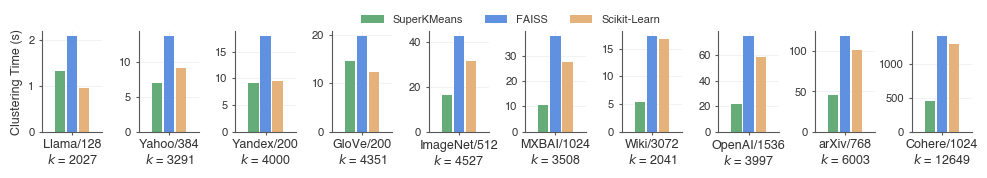

In [243]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(
    1, 10, 
    # constrained_layout=True, 
    # gridspec_kw={ 'width_ratios': [2, 1] }
)
tick_fonts_color = '#333333'
bar_text_color = '#191919'
font_color = "#383838"
fig.set_size_inches(12, 1.3)
plt.subplots_adjust(
    wspace=0.6
)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

df_to_plot = df_end_to_end_zen5

for i, cur_dataset in enumerate(df_to_plot['dataset'].unique()):
    cur_ax = axes[i]
    dim = df_to_plot[df_to_plot['dataset'] == cur_dataset]['dimensionality'].values[0]
    n_clusters = df_to_plot[df_to_plot['dataset'] == cur_dataset]['n_clusters'].values[0]
    sns.barplot(
        data=df_to_plot[df_to_plot['dataset'] == cur_dataset], 
        x="dataset", 
        y="construction_time", 
        hue='algorithm',
        ax=cur_ax,
        errorbar=None,
        dodge=True,
        gap=0.15,
        width=0.6,
        palette=colors_algorithms
    )
    cur_ax.xaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.yaxis.grid(linewidth=0.5, color='#ededed')
    cur_ax.set_axisbelow(True)
    if i == 0:
        cur_ax.legend(
            bbox_to_anchor=(10.4, 1.27),
            # [handles[idx] for idx in order],[labels[idx] for idx in order],
            loc="upper right",
            prop={'size': 8.0},
            labelcolor=font_color,
            frameon=False,
            ncols=3
        )
        cur_ax.set_ylabel('Clustering Time (s)', fontdict={"size": 9}, color=font_color)
    else:
        cur_ax.legend().set_visible(False)
        cur_ax.set_ylabel('')
    # cur_ax.set_xlabel(f'{cur_k}', fontdict={"size": 9}, color=font_color)
    cur_ax.set_xlabel(f'')
    cur_ax.set_xticks([0], labels=[f'{cur_dataset}/{dim}\n$k$ = {n_clusters}'])
    

    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    cur_ax.spines['left'].set_visible(True)
    cur_ax.spines['left'].set_color("#585858")
    cur_ax.spines['bottom'].set_color("#585858")
    cur_ax.tick_params(axis='x',  labelsize=9, colors=tick_fonts_color)
    cur_ax.tick_params(axis='y', labelsize=8, colors=tick_fonts_color)
    cur_ax.tick_params(axis='both', length=2, color="#585858")

# fig.supxlabel('Number of Clusters ($k$)', x=0.5, y=-0.09, fontsize=9, color=font_color)

# plt.savefig(f'../plotter/paper_plots/clustering_time.png', format='png', dpi=600, bbox_inches='tight')